In [1]:
import nmresearch as nmr
import pickle # this loads data from saved numpy arrays

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from scipy.linalg import expm

In [2]:
def func(x, a, b, c, d):
    return d * np.exp(- (x / a) ** b ) + c
def fancy_fit(vals, T, title=None, real_time=True, save=None, ylabel=None):
    decay=abs(vals)
    x = np.arange(0,len(decay))
    guess=25
    if real_time:
        x = x*T
        guess=2000
    
    popt, pcov = curve_fit(func, x, decay, p0=[guess, 4/5, 0, 1])
    perr = np.sqrt(np.diag(pcov))

    plt.plot(x, func(x, *popt), 'r-',label=r'Fit: $\tau_F$=%5.3f, b=%5.3f' % tuple(popt[0:2]))
    plt.scatter(x, vals,label="Data")
    if real_time:
        plt.xlabel("Experimental Time (us)")
    else:
        plt.xlabel("Floquet Kicking Periods")
        
    if title is not None:
        plt.title(title)
    
    plt.ylabel("Signal (a.u.)") if ylabel is None else plt.ylabel(ylabel)
    
    plt.yticks(np.arange(0, 1.5, .5))

    plt.legend()
    if save is not None:
        plt.savefig(save+".pdf", format='pdf', dpi=900,bbox_inches='tight')
    plt.show()
    return perr

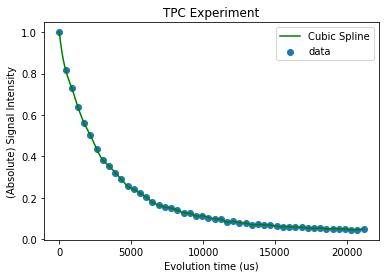

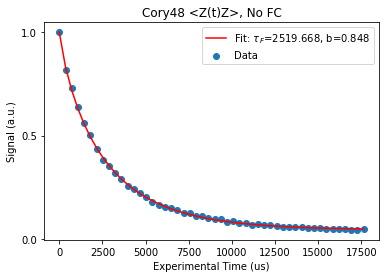

array([2.21970969e+01, 8.79199435e-03, 1.66776537e-03, 5.32329893e-03])

In [3]:
cory_zz = nmr.Experiment(154).tpc(cycle=24*3*6,)
t = np.arange(0,24*3*6*50, 24*3*6)
#tau = exp_fit(cory_zz,gauss=False)
fancy_fit(cory_zz,24*3*5,title="Cory48 <Z(t)Z>, No FC")

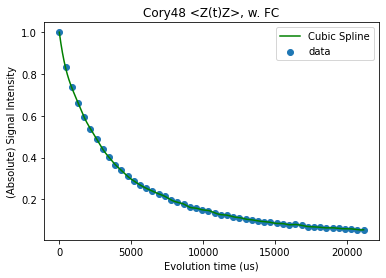

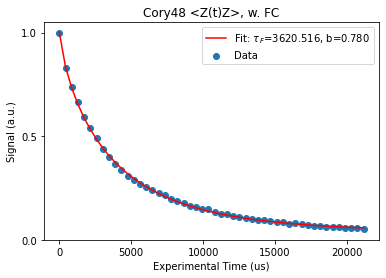

array([2.99080149e+01, 7.25361358e-03, 2.13016038e-03, 4.97035374e-03])

In [4]:
cory_zz_fc = nmr.Experiment(155).tpc(cycle=24*3*6,title="Cory48 <Z(t)Z>, w. FC")
fancy_fit(cory_zz_fc,24*3*6,title="Cory48 <Z(t)Z>, w. FC")

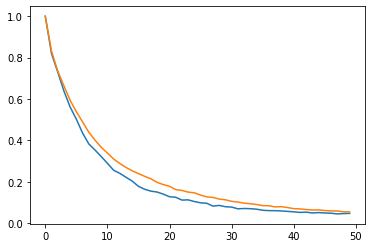

In [5]:
plt.plot(cory_zz)
plt.plot(cory_zz_fc)
plt.show()

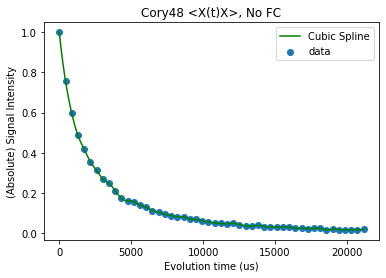

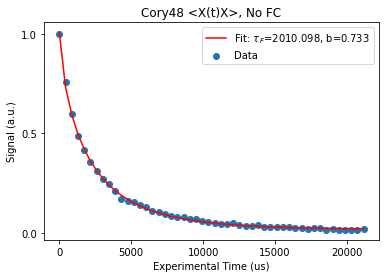

array([2.59586736e+01, 9.53380122e-03, 1.84828185e-03, 6.68319259e-03])

In [6]:
cory_xx = nmr.Experiment(156).tpc(cycle=24*3*6,title="Cory48 <X(t)X>, No FC")
t = np.arange(0,24*3*6*50, 24*3*6)
#tau = exp_fit(cory_xx,gauss=False)
fancy_fit(cory_xx,24*3*6,title="Cory48 <X(t)X>, No FC")

C:\Users\awsta\Documents\workspace\qeg-env\lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


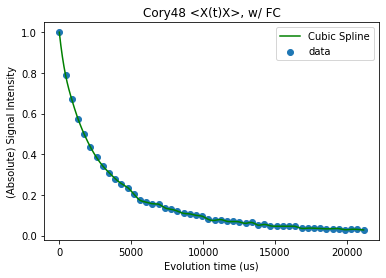

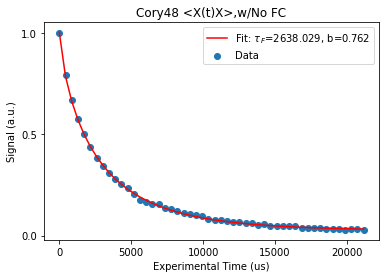

array([2.60254256e+01, 8.04273653e-03, 1.81320890e-03, 5.53594215e-03])

In [7]:
cory_xx_fc = nmr.Experiment(159).tpc(cycle=24*3*6,title="Cory48 <X(t)X>, w/ FC")
t = np.arange(0,24*3*6*50, 24*3*6)
#tau = exp_fit(cory_xx,gauss=False)
fancy_fit(cory_xx_fc,24*3*6,title="Cory48 <X(t)X>,w/No FC")

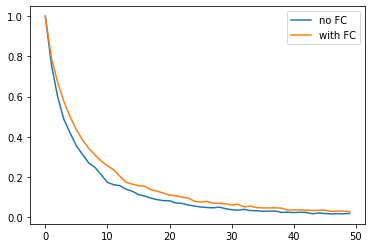

In [8]:
plt.plot(cory_xx,label="no FC")
plt.plot(cory_xx_fc,label="with FC")
plt.legend()
plt.show()

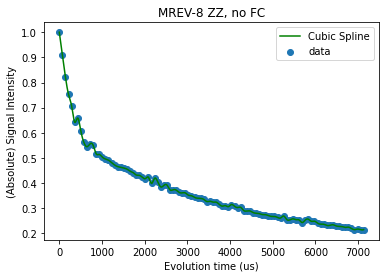

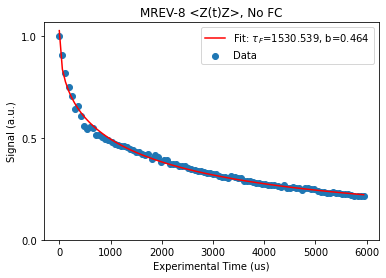

array([1.71734797e+02, 2.12800970e-02, 2.82033759e-02, 3.58510043e-02])

In [9]:
mrev_zz = nmr.Experiment(157).tpc(cycle=72,title="MREV-8 ZZ, no FC")
t = np.arange(0,72*100, 72)
fancy_fit(mrev_zz,60,title="MREV-8 <Z(t)Z>, No FC")

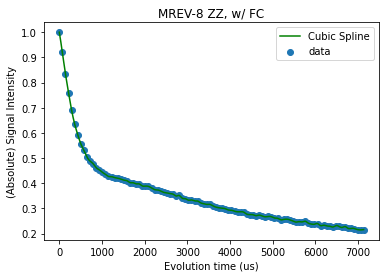

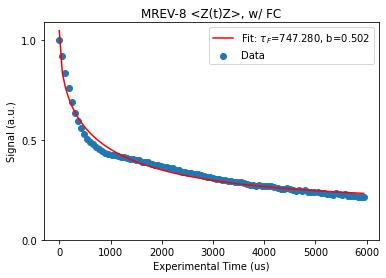

array([5.96459891e+01, 2.84789776e-02, 1.63981677e-02, 3.05447617e-02])

In [10]:
mrev_zz_fc = nmr.Experiment(158).tpc(cycle=72,title="MREV-8 ZZ, w/ FC")
t = np.arange(0,72*100, 72)
fancy_fit(mrev_zz_fc,60,title="MREV-8 <Z(t)Z>, w/ FC")

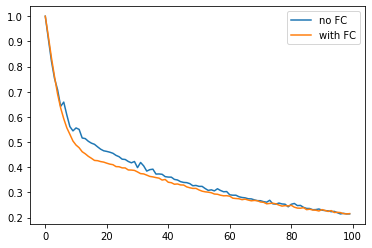

In [11]:
plt.plot(mrev_zz, label="no FC")
plt.plot(mrev_zz_fc, label="with FC")
plt.legend()
plt.show()

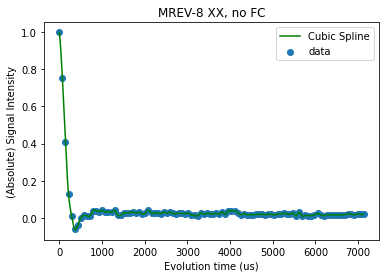

C:\Users\awsta\AppData\Local\Temp\ipykernel_28908\611578078.py:2: RuntimeWarning: divide by zero encountered in power
  return d * np.exp(- (x / a) ** b ) + c
C:\Users\awsta\AppData\Local\Temp\ipykernel_28908\611578078.py:2: RuntimeWarning: invalid value encountered in power
  return d * np.exp(- (x / a) ** b ) + c


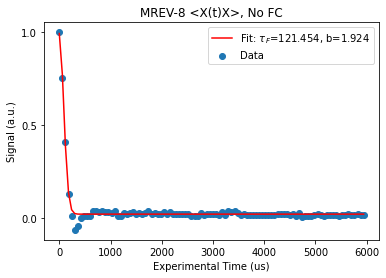

array([1.57650977e+00, 6.39938825e-02, 1.03185832e-03, 9.94336696e-03])

In [12]:
mrev_xx = nmr.Experiment(160).tpc(cycle=72,title="MREV-8 XX, no FC")
t = np.arange(0,60*50, 60)
fancy_fit(mrev_xx,60,title="MREV-8 <X(t)X>, No FC")

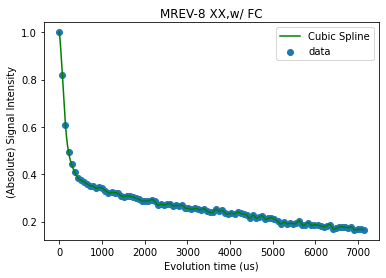

C:\Users\awsta\AppData\Local\Temp\ipykernel_28908\611578078.py:2: RuntimeWarning: divide by zero encountered in power
  return d * np.exp(- (x / a) ** b ) + c
C:\Users\awsta\AppData\Local\Temp\ipykernel_28908\611578078.py:2: RuntimeWarning: invalid value encountered in power
  return d * np.exp(- (x / a) ** b ) + c


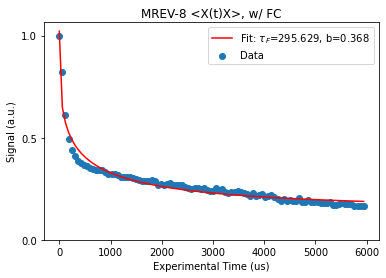

array([3.74667110e+01, 2.98424514e-02, 1.92466316e-02, 3.47035158e-02])

In [13]:
mrev_xx_fc = nmr.Experiment(161).tpc(cycle=72,title="MREV-8 XX,w/ FC")
t = np.arange(0,60*50, 60)
fancy_fit(mrev_xx_fc,60,title="MREV-8 <X(t)X>, w/ FC")

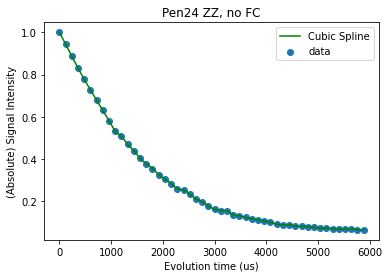

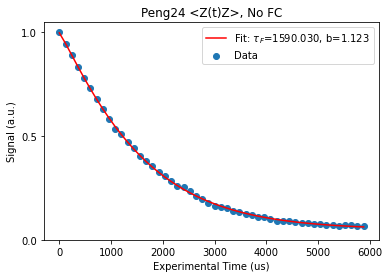

array([8.16946367e+00, 9.52469440e-03, 1.92510681e-03, 4.22486284e-03])

In [14]:
peng_zz = nmr.Experiment(172).tpc(cycle=120,title="Pen24 ZZ, no FC")
t = np.arange(0,120*50, 120)
fancy_fit(peng_zz,120,title="Peng24 <Z(t)Z>, No FC")

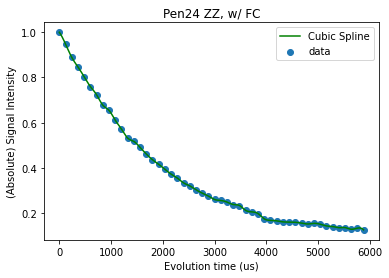

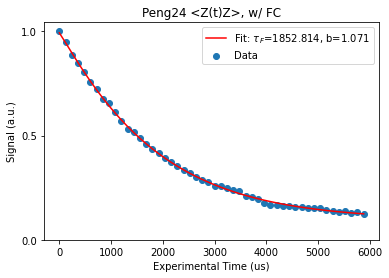

array([1.79499866e+01, 1.54039280e-02, 4.20676457e-03, 7.40410024e-03])

In [15]:
peng_zz_fc = nmr.Experiment(173).tpc(cycle=120,title="Pen24 ZZ, w/ FC")
t = np.arange(0,120*50, 120)
fancy_fit(peng_zz_fc,120,title="Peng24 <Z(t)Z>, w/ FC")

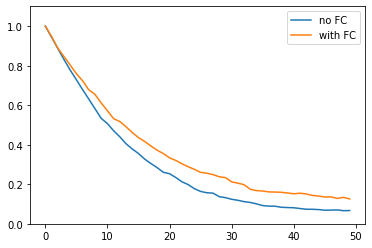

In [16]:
plt.plot(peng_zz,label="no FC")
plt.plot(peng_zz_fc,label="with FC")
plt.ylim([0,1.1])
plt.legend()
plt.show()

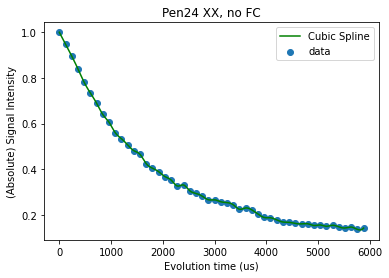

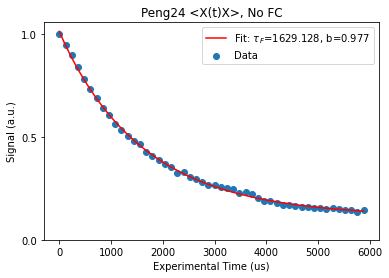

array([2.12652162e+01, 1.77257655e-02, 4.99608049e-03, 9.35212857e-03])

In [17]:
peng_xx = nmr.Experiment(169).tpc(cycle=120,title="Pen24 XX, no FC")
t = np.arange(0,120*50, 120)
fancy_fit(peng_xx,120,title="Peng24 <X(t)X>, No FC")

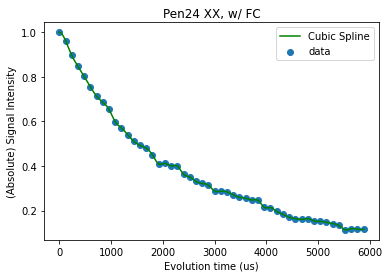

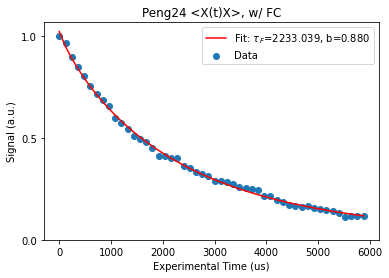

array([7.85080947e+01, 2.73198081e-02, 1.69505632e-02, 2.29073720e-02])

In [18]:
peng_xx_fc = nmr.Experiment(170).tpc(cycle=120,title="Pen24 XX, w/ FC")
t = np.arange(0,120*50, 120)
fancy_fit(peng_xx_fc,120,title="Peng24 <X(t)X>, w/ FC")

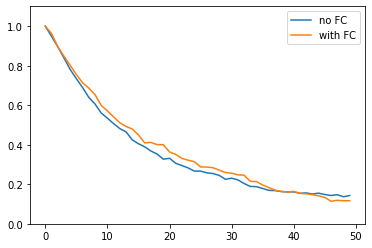

In [19]:
plt.plot(peng_xx,label="no FC")
plt.plot(peng_xx_fc,label="with FC")
plt.ylim([0,1.1])
plt.legend()
plt.show()

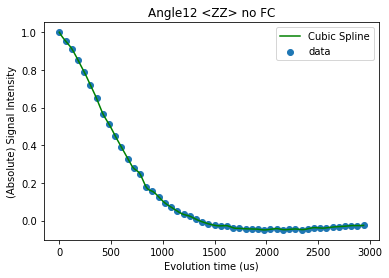

In [20]:
ang12_zz = nmr.Experiment(292).tpc(cycle=12*5,title="Angle12 <ZZ> no FC")

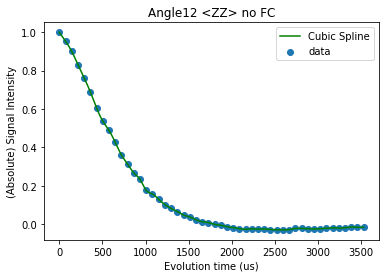

In [21]:
ang12_zz = nmr.Experiment(293).tpc(cycle=12*6,title="Angle12 <ZZ> no FC")

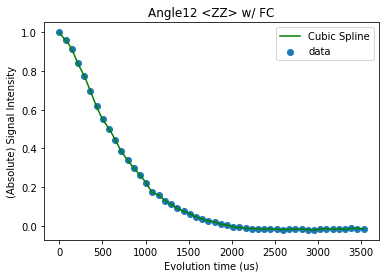

In [22]:
ang12_zz_fc = nmr.Experiment(294).tpc(cycle=12*6,title="Angle12 <ZZ> w/ FC")

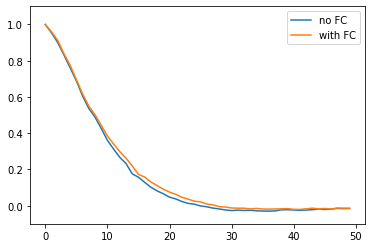

In [23]:
plt.plot(ang12_zz,label="no FC")
plt.plot(ang12_zz_fc,label="with FC")
plt.ylim([-.1,1.1])
plt.legend()
plt.show()

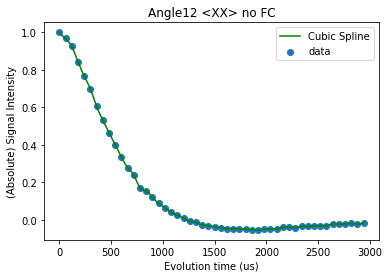

In [24]:
ang12_xx = nmr.Experiment(296).tpc(cycle=60,title="Angle12 <XX> no FC",normalize=True)

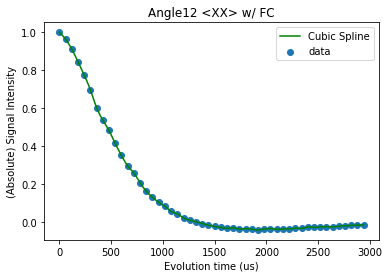

In [25]:
ang12_xx_fc = nmr.Experiment(297).tpc(cycle=60,title="Angle12 <XX> w/ FC",normalize=True)

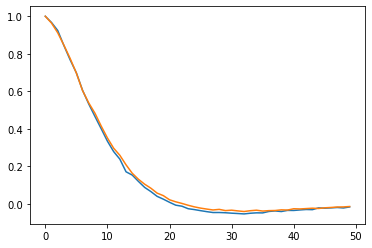

In [26]:
plt.plot(ang12_xx)
plt.plot(ang12_xx_fc)